In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Dataset from: https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [2]:
data = "city_temperature.csv"
df = pd.read_csv(data)
df.head()

c:\users\bamid\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
df_Can  = df[ (df['Country'] == 'Canada') & (df['Year'] < 2020)]
df_Can.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1130116,North America,Canada,NaN,Calgary,1,1,1995,12.6
1130117,North America,Canada,NaN,Calgary,1,2,1995,4.5
1130118,North America,Canada,NaN,Calgary,1,3,1995,2.5
1130119,North America,Canada,NaN,Calgary,1,4,1995,11.4
1130120,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [4]:
#Delete columns with only NaN and drop all other NaNs
del df_Can['State']
df_Can.dropna(inplace=True)
df_Can.head()

c:\users\bamid\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Region,Country,City,Month,Day,Year,AvgTemperature
1130116,North America,Canada,Calgary,1,1,1995,12.6
1130117,North America,Canada,Calgary,1,2,1995,4.5
1130118,North America,Canada,Calgary,1,3,1995,2.5
1130119,North America,Canada,Calgary,1,4,1995,11.4
1130120,North America,Canada,Calgary,1,5,1995,11.3


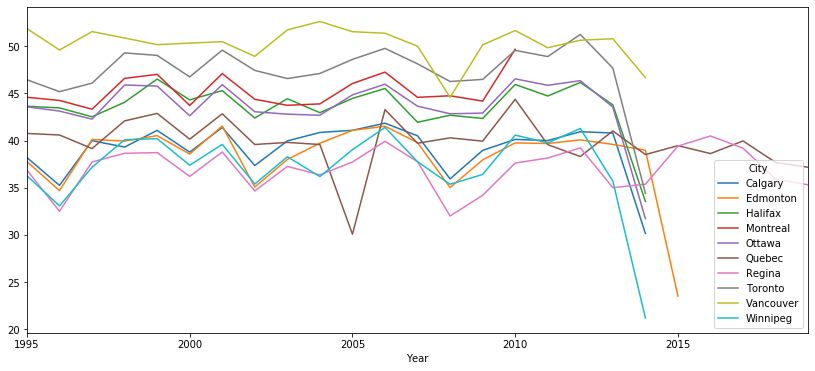

In [5]:
Can_plot=df_Can.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Can_plot.pivot('Year','City','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)

In [6]:
def season(df):
    if df in [12,1,2] :
        return 'Winter'
    elif  df in [3,4,5]:
        return 'Spring'
    elif df in [6,7,8]:
        return 'Summer'
    elif df in [9,10,11]:
        return 'Fall'
    else:
        return 'NA'

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
df_Can['Season'] = df_Can['Month'].apply(season)

In [8]:
df_Can['AvgTemperature']=df_Can['AvgTemperature'].astype('float64')
df_Can[['Month' , 'Day' , 'Year']]=df_Can[['Month' , 'Day' , 'Year']].astype('int64')

#### Extract Data for cities of Interest

In [9]:
df_Toronto = df_Can[df_Can['City'] == 'Toronto']
df_Edmonton = df_Can[df_Can['City'] == 'Ottawa']
df_Calgary = df_Can[df_Can['City'] == 'Calgary']
df_Ottawa = df_Can[df_Can['City'] == 'Ottawa']

#### Seasonal Temperature in Toronto, Canada

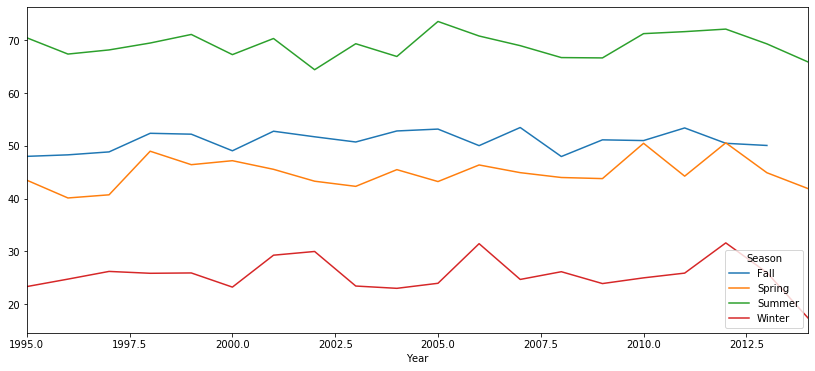

In [10]:
Toronto =df_Toronto.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Toronto.pivot('Year','Season','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)

#### Seasonal Temperature in Calgary, Canada

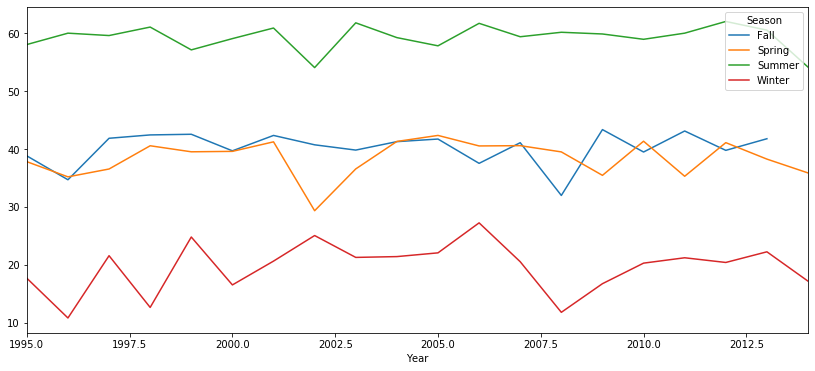

In [11]:
Calgary =df_Calgary.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Calgary.pivot('Year','Season','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)

#### Seasonal Temperature in Edmonton, Canada

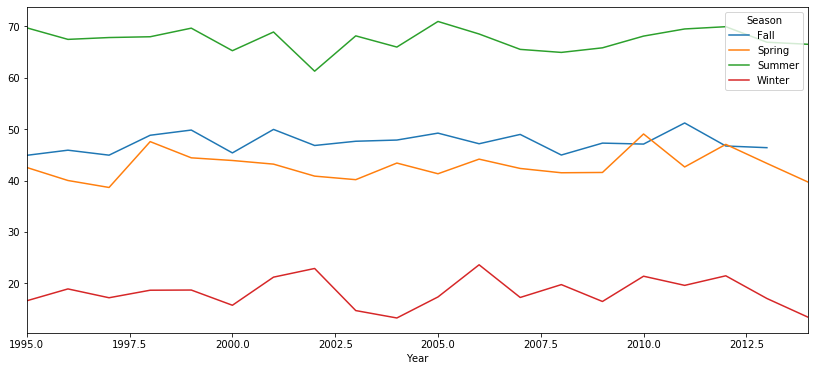

In [12]:
Edmonton =df_Edmonton.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Edmonton.pivot('Year','Season','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)

#### Seasonal Temperature in Ottawa, Canada

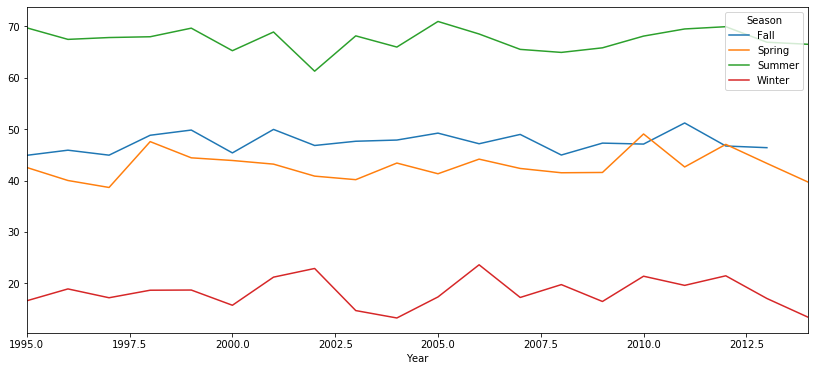

In [13]:
Ottawa =df_Ottawa.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Ottawa.pivot('Year','Season','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)

#### Compare the temperature for all cities in different seasons

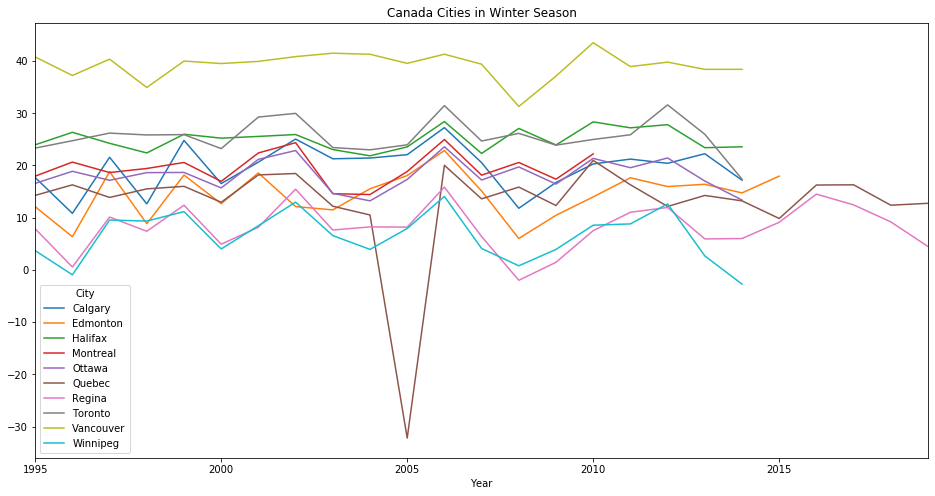

In [14]:
df_Winter = df_Can[df_Can['Season'] == 'Winter']
Winter=df_Winter.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Winter.pivot('Year','City','AvgTemperature').plot()
plt.title('Canada Cities in Winter Season')
plt.gcf().set_size_inches(16,8)

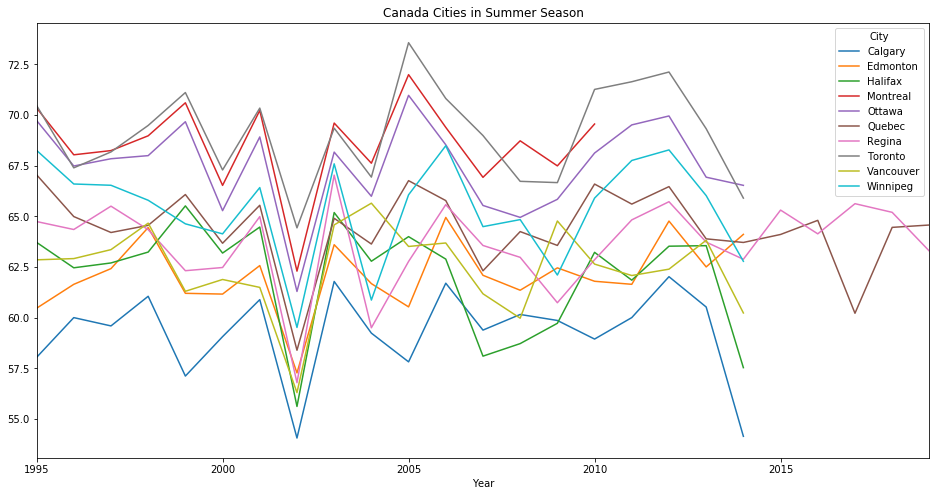

In [15]:
df_Summer = df_Can[df_Can['Season'] == 'Summer']
Summer=df_Summer.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Summer.pivot('Year','City','AvgTemperature').plot()
plt.title('Canada Cities in Summer Season')
plt.gcf().set_size_inches(16,8)

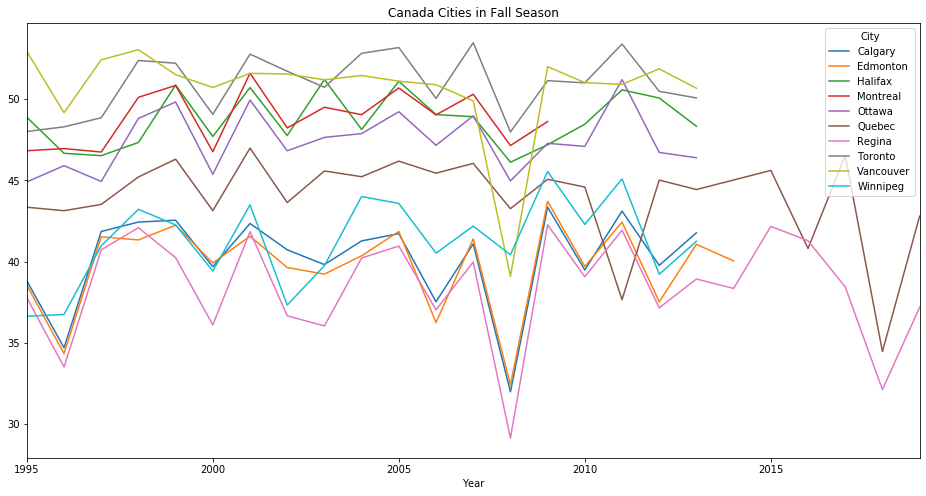

In [16]:
df_Fall = df_Can[df_Can['Season'] == 'Fall']
Fall=df_Fall.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Fall.pivot('Year','City','AvgTemperature').plot()
plt.title('Canada Cities in Fall Season')
plt.gcf().set_size_inches(16,8)

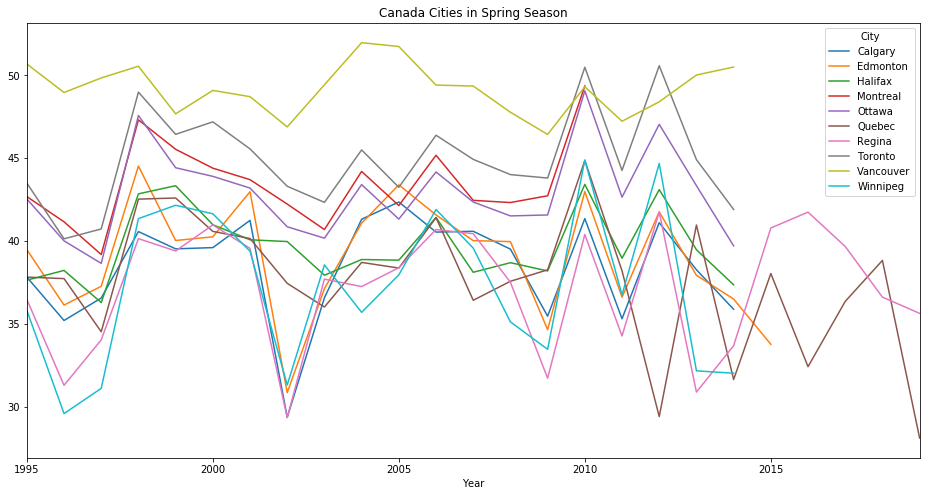

In [17]:
df_Spring = df_Can[df_Can['Season'] == 'Spring']
Spring=df_Spring.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Spring.pivot('Year','City','AvgTemperature').plot()
plt.title('Canada Cities in Spring Season')
plt.gcf().set_size_inches(16,8)